<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/LinearRegg_KNN_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import io
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['salary.csv']))
df.head() 


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
Normalised_Data=df[['YearsExperience', 'Salary']]
Normalised_Data=Normalised_Data.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
df[['YearsExperience', 'Salary']]=Normalised_Data

In [ ]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 70:15:15 for train:valid:test dataset

X = df.iloc[:, :-1].values
y = df.iloc[:,1].values
print(y)

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.70)

# Now since we want the valid and test size to be equal (15% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

[0.01904087 0.1000945  0.         0.06843846 0.02551382 0.22337586
 0.26481219 0.19742499 0.31554453 0.229837   0.30105126 0.21335932
 0.22709662 0.2285613  0.27616348 0.35680369 0.33425467 0.53575478
 0.51537916 0.66393811 0.63792818 0.7151193  0.75089771 0.89866525
 0.84691708 0.80145287 0.93595559 0.88476258 1.         0.9938696 ]
(21, 1)
(21,)
(4, 1)
(4,)
(5, 1)
(5,)


(None, None)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print(y_test)

[0.63792818 0.22337586 0.26481219 0.33425467 0.06843846]


###Step 3: Fit Simple Linear Regression model to training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)

In [ ]:
model.coef_,model.intercept_

(array([0.33448663]), 0.5027943707603524)

In [ ]:
model.score(X_train,y_train)

0.9642821055190991

###Step 4: Predict the test set

In [ ]:
y_pred = regressor.predict(X_test)    
y_pred

array([0.61398542, 0.17405561, 0.18533586, 0.42222114, 0.07253334])

###Step 5 — Visualizing the training set

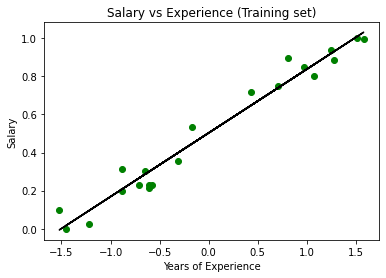

In [ ]:
plt.scatter(X_train, y_train, color = 'green')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='black')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

###Step 6 — Visualizing the test set

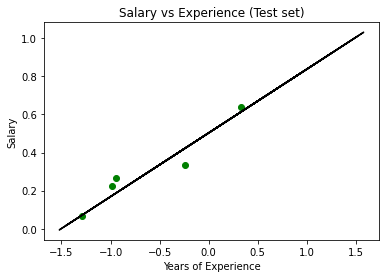

In [ ]:
plt.scatter(X_test, y_test, color = 'green')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='black')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

###step 6-Evaluation of our model by mean square error

In [ ]:
y_pred = regressor.predict(X_test)
y_pred
 


array([0.61398542, 0.17405561, 0.18533586, 0.42222114, 0.07253334])

In [ ]:
y_test

array([0.63792818, 0.22337586, 0.26481219, 0.33425467, 0.06843846])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
 
mse = mean_squared_error(y_test, y_pred) 
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

MSE =  0.0034154199275238913
RMSE =  0.05844159415625049


#***KNN Classifier Model***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import cross_val_score

import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

In [ ]:
iris=datasets.load_iris()
#np.c_ is numpy concatenation function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:,-1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

###split into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=0)

In [ ]:
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

print(f"training set size {X_train.shape[0]} samples \n Test set size {X_test.shape[0]} samples")

training set size 112 samples 
 Test set size 38 samples


#Normalise the Data

In [ ]:
scaler= Normalizer().fit(X_train)
norm_X_train=scaler.transform(X_train)
norm_X_test =scaler.transform(X_test)
print("Before Normalisation")
print(X_train[0:5])

Before Normalisation
[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]]


In [ ]:
print("After Normalisation")
print(norm_X_train[0:5])

After Normalisation
[[0.73923462 0.37588201 0.52623481 0.187941  ]
 [0.76262994 0.34186859 0.52595168 0.1577855 ]
 [0.71718148 0.31640359 0.58007326 0.22148252]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.73337886 0.32948905 0.54206264 0.24445962]]


#Visualise the Dataset before and after the Normalisation

Text(0.5, 1.08, 'Pair Plot of Dataset After Normalisation')

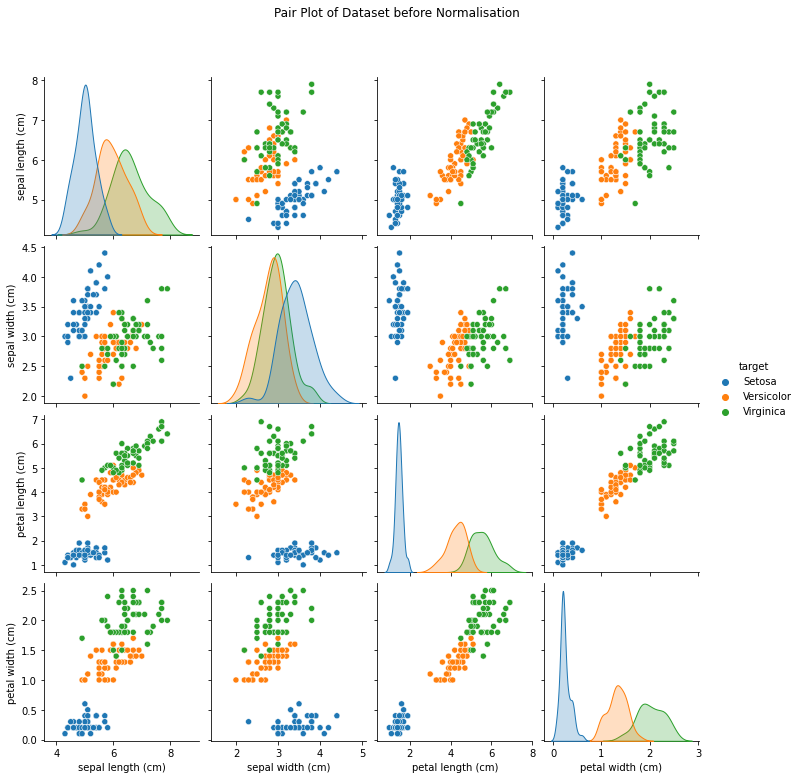

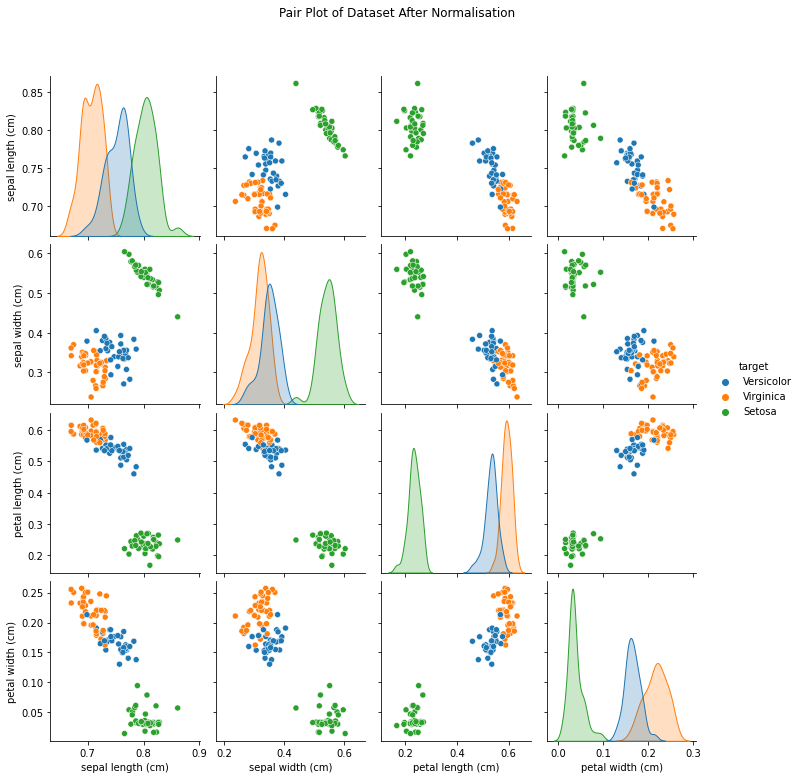

In [ ]:
di={0.0: "Setosa", 1.0: "Versicolor",2.0:"Virginica"}
before = sns.pairplot(iris_df.replace({"target":di}),hue='target')
before.fig.suptitle("Pair Plot of Dataset before Normalisation",y=1.08)

#After Normalisation
iris_df_2= pd.DataFrame(data= np.c_[norm_X_train,y_train],
                     columns= iris['feature_names'] + ['target'])
di={0.0: "Setosa", 1.0: "Versicolor",2.0:"Virginica"}
before = sns.pairplot(iris_df_2.replace({"target":di}),hue='target')
before.fig.suptitle("Pair Plot of Dataset After Normalisation",y=1.08)

#Making a KNN Classifier Model and Prediction

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(norm_X_train,y_train)
y_predict_sklearn = knn.predict(norm_X_test)
print(y_predict_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 2. 1. 0. 2.]


#Output Visualisation

In [ ]:
"""
   Calculating Accuracy
"""
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict_sklearn)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 92.11 %.


In [ ]:
print(y_test)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 1.]


In [ ]:
print(y_predict_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 2. 1. 0. 2.]


In [ ]:
"""
Confusion Matrix
"""
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict_sklearn)
cm

array([[13,  0,  0],
       [ 0, 13,  3],
       [ 0,  0,  9]])

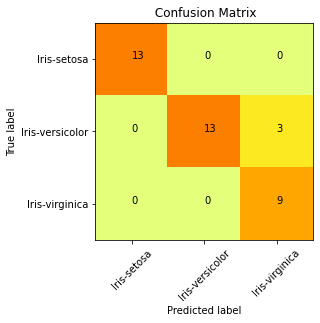

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Iris-setosa'  ,'Iris-versicolor','Iris-virginica']
plt.title(' Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
#s = [['TN','FP'], ['FN', 'TP']]
for i in range(3):
    for j in range(3):
        plt.text(j,i, str(cm[i][j]))
plt.show()

In [ ]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(norm_X_train,y_train)
    y_predi = knn.predict(norm_X_test)
    ac = accuracy_score(y_test, y_predi)
    cv_scores.append(ac)
print(cv_scores)

[0.9736842105263158, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]


In [ ]:
# Instantiate learning model (k = 4)
classifier = KNeighborsClassifier(n_neighbors=13)

# Fitting the model
classifier.fit(norm_X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.37 %.


#***K means Clustering***

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

In [ ]:
iris=datasets.load_iris()
#np.c_ is numpy concatenation function
iris_dataframe = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
X = iris_dataframe.iloc[:,:-1].values
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Text(0, 0.5, 'Sepal length')

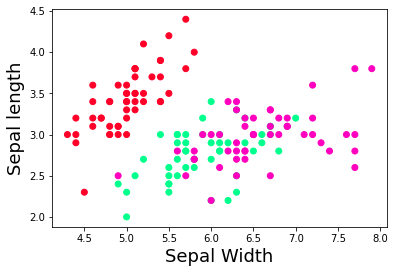

In [ ]:
plt.scatter(x=iris_dataframe['sepal length (cm)'], y=iris_dataframe['sepal width (cm)'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

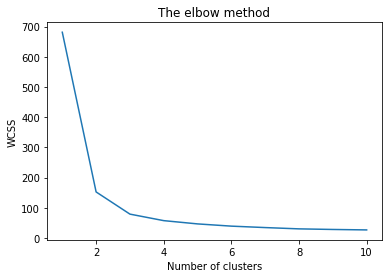

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

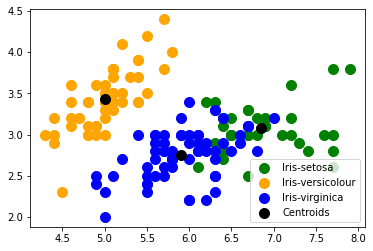

In [ ]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()